# MRMS overview

In [13]:
from datetime import datetime
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pansat.products.ground_based.mrms import mrms_precip_rate
import cartopy.crs as ccrs

In [44]:
import seaborn as sns
sns.reset_orig()
from matplotlib import style
style.use("plots.mplstyle")

In [2]:
start_time = datetime(2022, 5, 1, 0, 0)
end_time = datetime(2022, 5, 1, 0, 5)

In [3]:
files = mrms_precip_rate.download(start_time, end_time)

In [14]:
mrms = mrms_precip_rate.open(files[0])

/tmp/ipykernel_18576/3150419281.py:24: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(m, label="Surface precipitation [$\si{\milli \meter \per \hour}$]")


Text(0.5, 1.0, 'MRMS ground-based precipitation measurments')

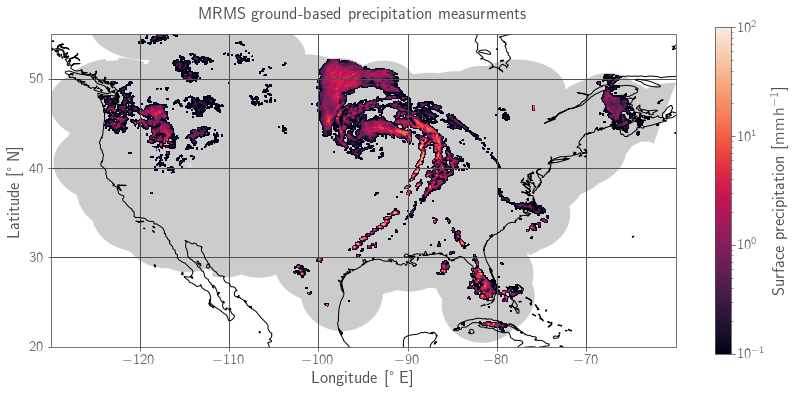

In [53]:
from matplotlib.colors import LogNorm
f = plt.figure(figsize=(14, 6))
ax = f.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

norm = LogNorm(1e-1, 1e2)

lons = mrms.longitude.data
lats = mrms.latitude.data
lon_min, lon_max = lons.min(), lons.max()
lon_min -= 360
lon_max -= 360
lat_min, lat_max = lats.min(), lats.max()

sp = mrms.precip_rate.data.copy()
sp[sp < 0] = np.nan
ax.imshow(sp >= 0, extent=(lon_min, lon_max, lat_min, lat_max), cmap="Greys", alpha=0.2)
m = ax.imshow(sp, extent=(lon_min, lon_max, lat_min, lat_max), norm=norm, cmap="rocket")
ax.coastlines()
ax.set_xticks(np.linspace(-120, -70, 6))
ax.set_yticks(np.linspace(20, 50, 4))
ax.set_ylabel("Latitude [$\si{\degree}$ N]")
ax.set_xlabel("Longitude [$\si{\degree}$ E]")

plt.colorbar(m, label="Surface precipitation [$\si{\milli \meter \per \hour}$]")
f.savefig("mrms_overview.png", dpi=200)
ax.set_title("MRMS ground-based precipitation measurments")

In [34]:
lat_min, lat_max

(20.005000000002696, 54.995)